# Generate Heatmaps on Misclassified Images and Single Images by Filename

In [1]:
%matplotlib inline

### Start a CAS session

In [ ]:
sess.endsession()

In [2]:
import swat
sess = swat.CAS(cashost, casport)

### Import Image Data

In [3]:
import dlpy
from dlpy.images import ImageTable


`img_path` should be a fully-qualified directory that is accessible by the CAS server session.
The folder structure is as follows:

   * Giraffe_Dolphin
       * Giraffe
           * Giraffe image 1
           * Girrafe image 2
           * ...
       * Dolphin
           * Dolphin image 1
           * Dolphin image 2
           * ...
           
We are using giraffe and dolphin images in this example.  Your case may differ.

In [4]:
img_path='/path/to/images/Giraffe_Dolphin'
my_images = ImageTable.load_files(sess, path=img_path)

In [5]:
sess.tableinfo()

[TableInfo]

                Name  Rows  Columns  IndexedColumns Encoding  \
 0  IMAGEDATA_PX7CFY  2148        4               0    utf-8   
 
          CreateTimeFormatted           ModTimeFormatted  \
 0  2018-06-28T11:02:08-04:00  2018-06-28T11:02:08-04:00   
 
          AccessTimeFormatted JavaCharSet    CreateTime      ...       Global  \
 0  2018-06-28T11:02:08-04:00        UTF8  1.845817e+09      ...            0   
 
    Repeated  View  SourceName  SourceCaslib Compressed Creator  Modifier  \
 0         0     0                                    0  adstev             
 
   SourceModTimeFormatted SourceModTime  
 0                                  NaN  
 
 [1 rows x 22 columns]

+ Elapsed: 0.0011s, user: 0.00103s, sys: 1.9e-05s, mem: 0.672mb

#### Resize images to match model input

In [6]:
my_images.resize(width=224)

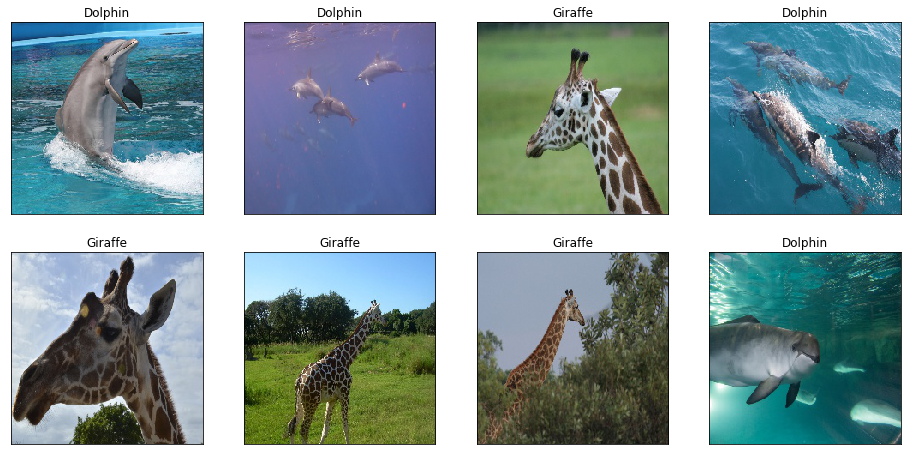

In [7]:
my_images.show(8, 4)

In [8]:
from dlpy.splitting import two_way_split

In [9]:
sess.tableinfo()

[TableInfo]

                Name  Rows  Columns  IndexedColumns Encoding  \
 0  IMAGEDATA_PX7CFY  2148        4               0    utf-8   
 
          CreateTimeFormatted           ModTimeFormatted  \
 0  2018-06-28T11:02:11-04:00  2018-06-28T11:02:11-04:00   
 
          AccessTimeFormatted JavaCharSet    CreateTime      ...       Global  \
 0  2018-06-28T11:02:13-04:00        UTF8  1.845817e+09      ...            0   
 
    Repeated  View  SourceName  SourceCaslib Compressed Creator  Modifier  \
 0         0     0                                    0  adstev             
 
   SourceModTimeFormatted SourceModTime  
 0                                  NaN  
 
 [1 rows x 22 columns]

+ Elapsed: 0.000796s, user: 0.000745s, mem: 0.672mb

In [10]:
tr_img, te_img = two_way_split(my_images, test_rate=20,train_name='tr_img',test_name='te_img', seed=123)

In [11]:
sess.tableinfo()

[TableInfo]

                Name  Rows  Columns  IndexedColumns Encoding  \
 0  IMAGEDATA_PX7CFY  2148        4               0    utf-8   
 1            TR_IMG  1719        4               0    utf-8   
 2            TE_IMG   429        4               0    utf-8   
 
          CreateTimeFormatted           ModTimeFormatted  \
 0  2018-06-28T11:02:11-04:00  2018-06-28T11:02:11-04:00   
 1  2018-06-28T11:02:16-04:00  2018-06-28T11:02:16-04:00   
 2  2018-06-28T11:02:16-04:00  2018-06-28T11:02:16-04:00   
 
          AccessTimeFormatted JavaCharSet    CreateTime      ...       Global  \
 0  2018-06-28T11:02:16-04:00        UTF8  1.845817e+09      ...            0   
 1  2018-06-28T11:02:16-04:00        UTF8  1.845817e+09      ...            0   
 2  2018-06-28T11:02:16-04:00        UTF8  1.845817e+09      ...            0   
 
    Repeated  View  SourceName  SourceCaslib Compressed Creator  Modifier  \
 0         0     0                                    0  adstev             
 1         0     0                                    0  adstev             
 2         0     0                                    0  adstev             
 
   SourceModTimeFormatted SourceModTime  
 0                                  NaN  
 1                                  NaN  
 2                                  NaN  
 
 [3 rows x 22 columns]

+ Elapsed: 0.000568s, sys: 0.000541s, mem: 0.674mb

### Reload a Model from a sashdat file

In [12]:
from dlpy import Model, Sequential
from dlpy.layers import * 
from dlpy.applications import *

In [13]:
model_r = Model(sess)
model_file = '/path/to/trained/model/Dol_Gir_CNN.sashdat'
model_r.load(path=model_file)

NOTE: Model table is loaded successfully!
NOTE: Model is renamed to "dol_gir_cnn" according to the model name in the table.
NOTE: Dol_Gir_CNN_weights.sashdat is used as model weigths.
NOTE: Model weights attached successfully!
NOTE: Dol_Gir_CNN_weights_attr.sashdat is used as weigths attribute.
NOTE: Model attributes attached successfully!


### Run Prediction on test images

In [14]:
model_r.predict(te_img)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           429
 1  Number of Observations Used           429
 2  Misclassification Error (%)      10.48951
 3                   Loss Error      0.273197

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(adstev)  Valid_Res_ne1tsK   429        9   
 
                                             casTable  
 0  CASTable('Valid_Res_ne1tsK', caslib='CASUSER(a...  

+ Elapsed: 1.06s, user: 43.9s, sys: 4.44s, mem: 3.57e+03mb

### Run heatmap on validation set containing correct and incorrect predections

#### When an ImageTable is passed to data the predictions are run again. To  avoid running again do not pass an ImageTable, the previously calculated results from model_r.predict(te_img) are used.


Running prediction ...
... finished running prediction
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_KHOBMK contains compressed images.


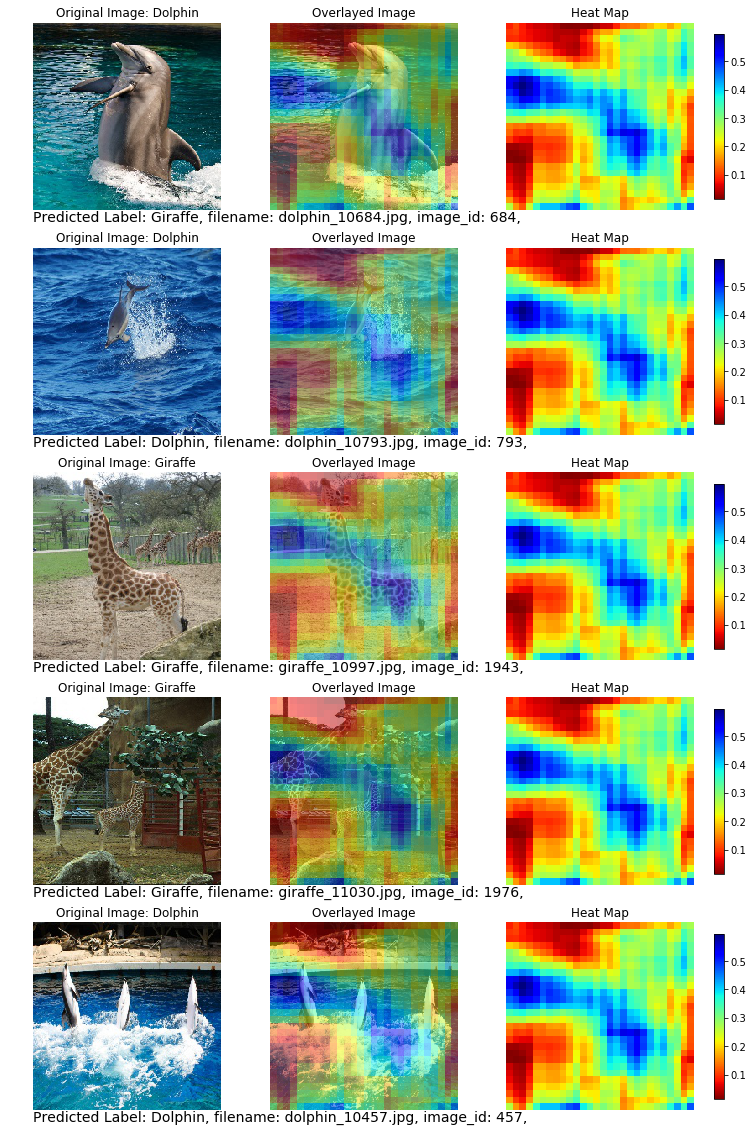

NOTE: Cloud Analytic Services dropped table SAMPLE_TBL_kHobMK from caslib CASUSER(adstev).


I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe          0.142254          0.857746  dolphin_10684.jpg   684   
1   Dolphin          0.993843          0.006157  dolphin_10793.jpg   793   
2   Giraffe          0.000123          0.999877  giraffe_10997.jpg  1943   
3   Giraffe          0.000436          0.999564  giraffe_11030.jpg  1976   
4   Dolphin          0.999832          0.000168  dolphin_10457.jpg   457   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.08776061981916428, 0.08776061981916428, 0....  
1  [[0.08776061981916428, 0.08776061981916428, 0....  
2  [[0.08776061981916428, 0.08776061981916428, 0....  
3  [[0.08776061981916428, 0.08776061981916428, 0....  
4  [[0.08776061981916428, 0.08776061981916428, 0....

In [15]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, gpu=dict(devices=[0]))

#### Running heat_map_analysis without a data input avoids running the prediction calculations again

Using results from model.predict()
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_QIQVPV contains compressed images.


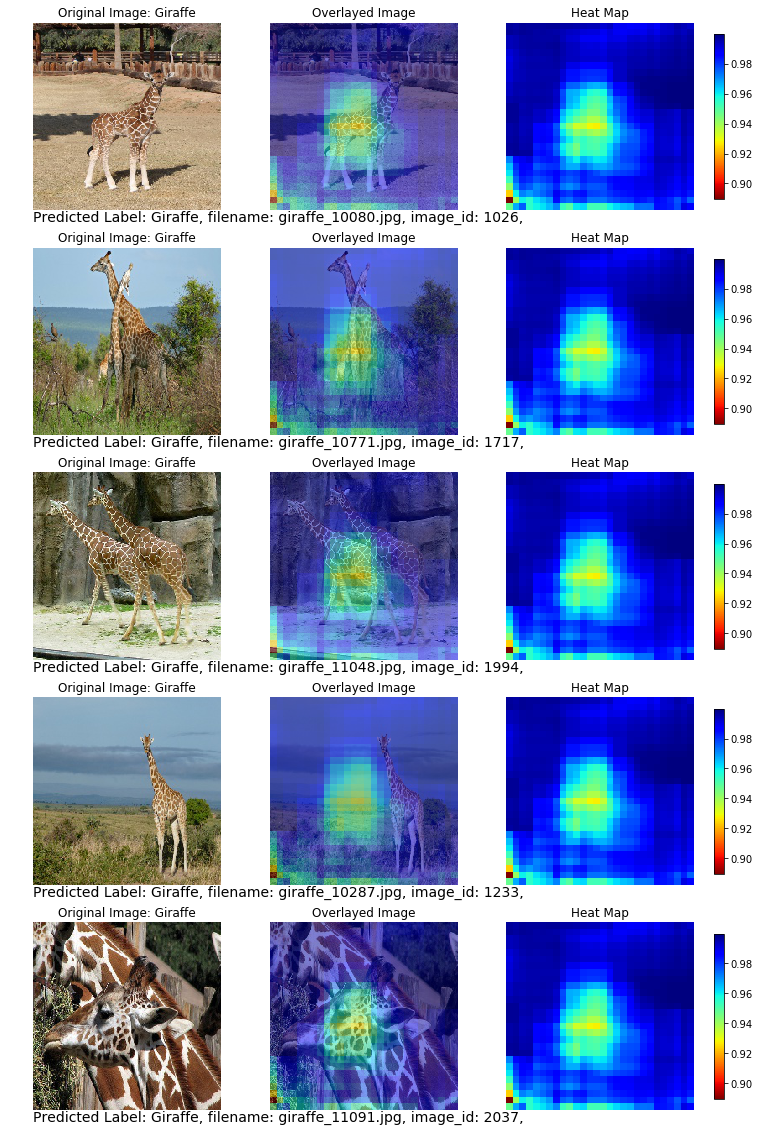

NOTE: Cloud Analytic Services dropped table SAMPLE_TBL_QiqvpV from caslib CASUSER(adstev).


I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe      3.710527e-03          0.996289  giraffe_10080.jpg  1026   
1   Giraffe      1.106434e-01          0.889357  giraffe_10771.jpg  1717   
2   Giraffe      8.832236e-03          0.991168  giraffe_11048.jpg  1994   
3   Giraffe      4.967821e-01          0.503218  giraffe_10287.jpg  1233   
4   Giraffe      6.452319e-10          1.000000  giraffe_11091.jpg  2037   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.9970370531082153, 0.9970370531082153, 0.99...  
1  [[0.9970370531082153, 0.9970370531082153, 0.99...  
2  [[0.9970370531082153, 0.9970370531082153, 0.99...  
3  [[0.9970370531082153, 0.9970370531082153, 0.99...  
4  [[0.9970370531082153, 0.9970370531082153, 0.99...

In [16]:
model_r.heat_map_analysis(mask_width=56, mask_height=56, step_size=8)

### Most of these heatmaps are correct classifications, lets see some heatmaps of misclassifications

Use the img_type parameter to 'M' misclassified, 'C' correct classification, or 'A' for all

Running prediction ...
... finished running prediction
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_GOWCV7 contains compressed images.


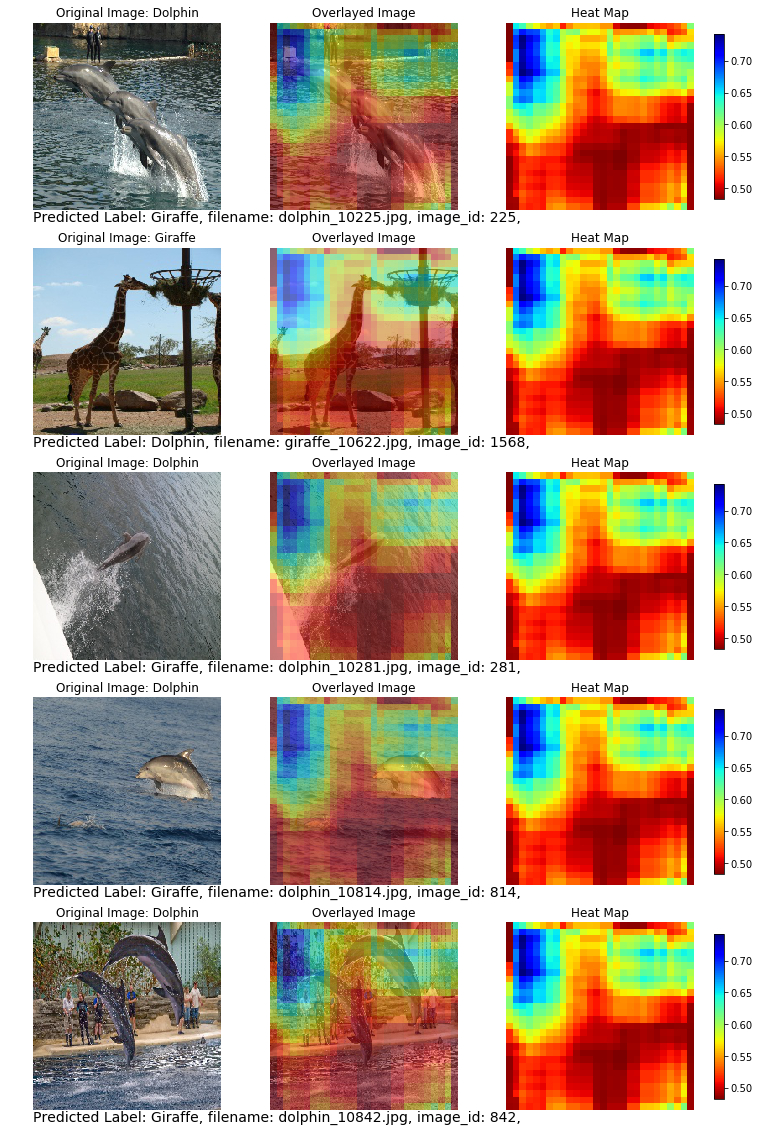

NOTE: Cloud Analytic Services dropped table SAMPLE_TBL_gowcV7 from caslib CASUSER(adstev).


In [17]:
misclass = model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='M')

In [18]:
misclass

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe          0.141697          0.858303  dolphin_10225.jpg   225   
1   Dolphin          0.512716          0.487284  giraffe_10622.jpg  1568   
2   Giraffe          0.482996          0.517004  dolphin_10281.jpg   281   
3   Giraffe          0.471194          0.528806  dolphin_10814.jpg   814   
4   Giraffe          0.368011          0.631989  dolphin_10842.jpg   842   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.48323726654052734, 0.48323726654052734, 0....  
1  [[0.48323726654052734, 0.48323726654052734, 0....  
2  [[0.48323726654052734, 0.48323726654052734, 0....  
3  [[0.48323726654052734, 0.48323726654052734, 0....  
4  [[0.48323726654052734, 0.48323726654052734, 0....

### Perhaps you want to only observe the heatmaps of specific images by _filename_0
You can pass a single filename or a list of filenames

In [19]:
misclass['_filename_0'].tolist()

['dolphin_10225.jpg',
 'giraffe_10622.jpg',
 'dolphin_10281.jpg',
 'dolphin_10814.jpg',
 'dolphin_10842.jpg']

In [28]:
two_misclass_names = misclass['_filename_0'].tolist()[:2]
print(two_misclass_names)

['dolphin_10225.jpg', 'giraffe_10622.jpg']


 filtering by filename or _id_ 
NOTE: Cloud Analytic Services dropped table TEMP_ANOTATED from caslib CASUSER(adstev).
Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_5QAEOD contains compressed images.


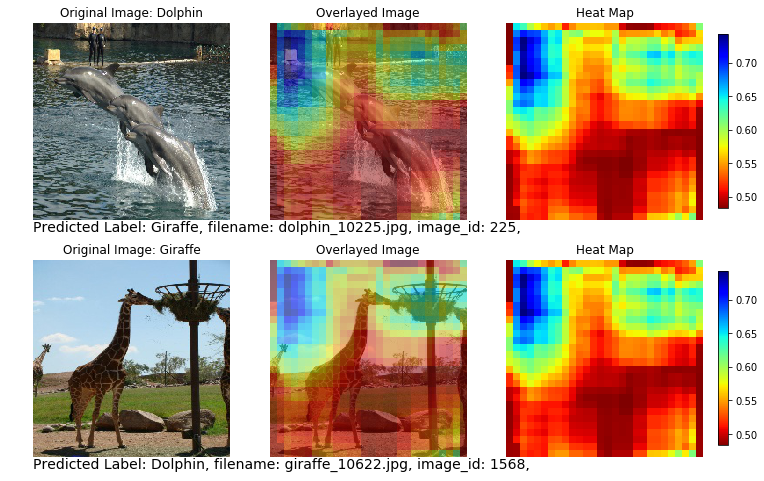

NOTE: Cloud Analytic Services dropped table Valid_Res_Complete_5QaEod from caslib CASUSER(adstev).


I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe          0.141697          0.858303  dolphin_10225.jpg   225   
1   Dolphin          0.512716          0.487284  giraffe_10622.jpg  1568   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.48323726654052734, 0.48323726654052734, 0....  
1  [[0.48323726654052734, 0.48323726654052734, 0....

In [22]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', filename = two_misclass_names)

### Filenames are not necessarily unique so use the image_id of the images found in the _id_ column

If both the image_id and filename parameter are passed the image_id superscedes filename because image_is unique

In [29]:
my_list = te_img['_id_'].tolist()[:4]
print(my_list)

[154, 793, 906, 1590]


 filtering by filename or _id_ 
NOTE: Cloud Analytic Services dropped table TEMP_ANOTATED from caslib CASUSER(adstev).
Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_VFBJ29 contains compressed images.


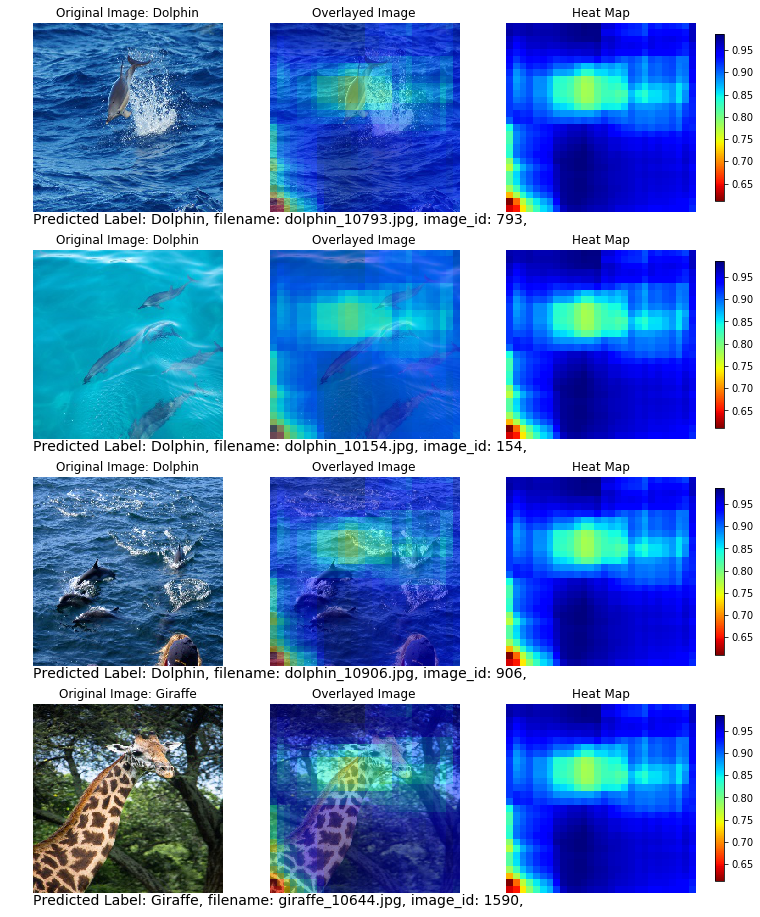

NOTE: Cloud Analytic Services dropped table Valid_Res_Complete_Vfbj29 from caslib CASUSER(adstev).


I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin          0.993843      6.156580e-03  dolphin_10793.jpg   793   
1   Dolphin          1.000000      2.468822e-09  dolphin_10154.jpg   154   
2   Dolphin          0.933825      6.617498e-02  dolphin_10906.jpg   906   
3   Giraffe          0.031266      9.687341e-01  giraffe_10644.jpg  1590   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.9704875349998474, 0.9704875349998474, 0.97...  
1  [[0.9704875349998474, 0.9704875349998474, 0.97...  
2  [[0.9704875349998474, 0.9704875349998474, 0.97...  
3  [[0.9704875349998474, 0.9704875349998474, 0.97...

In [25]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = my_list)

In [30]:
single = my_list[0]
print(single)

154


#### Or a single image id

 filtering by filename or _id_ 
NOTE: Cloud Analytic Services dropped table TEMP_ANOTATED from caslib CASUSER(adstev).
Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_KBUV4J contains compressed images.


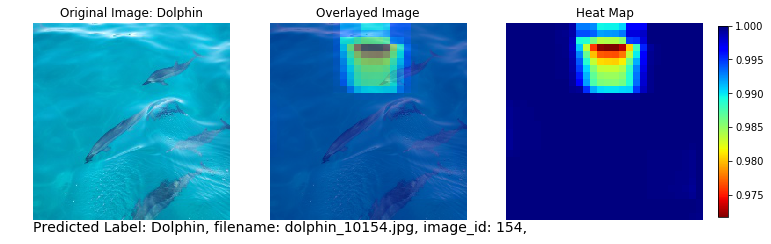

NOTE: Cloud Analytic Services dropped table Valid_Res_Complete_KBuV4J from caslib CASUSER(adstev).


I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0 _id_  \
0   Dolphin               1.0      2.468827e-09  dolphin_10154.jpg  154   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...

In [31]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = single, gpu=dict(devices=[0]))